In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

execfile ("_ImportScript.py")

1


In [2]:
# Make a Universe with large n_max
beatbox.You.initiate_simulated_universe( truncated_nmax=15, truncated_nmin=None, truncated_lmax=60, truncated_lmin=None, n_s=0.97,kstar=0.02,PSnorm=2.43e-9,Pdist=1,Pmax=2*np.pi,Pvar=0.0, fngrid=None, printout=1)

Generated  14146  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 1.2819413


/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/universe.py:580: RuntimeWarning: divide by zero encountered in power
  self.Power_Spectrum = self.PSnorm*10000*np.power((self.k/self.kstar) ,(-3+(self.n_s-1)))


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


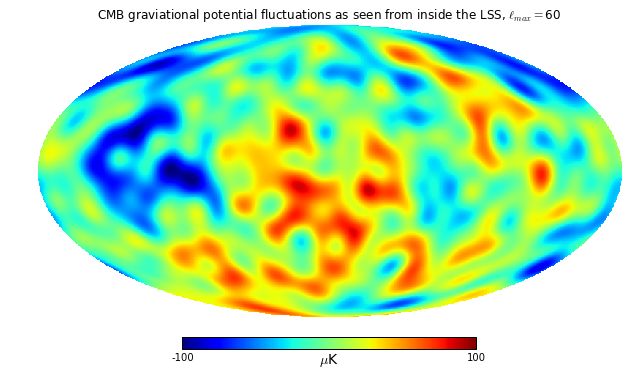

In [3]:
beatbox.You.all_simulated_universes[0].show_CMB_T_map()

In [ ]:
this_file='RobustnessAnalysis/MockUniverse_nmax15_lmax60_noiseupto8/TrueUniverse'
beatbox.You.all_simulated_universes[0].write_CMB_T_map(from_this=beatbox.You.all_simulated_universes[0].Tmap, to_this=this_file)

In [ ]:
# Calculate C_yy from the 100 posterior sample Commander Planck CMB temperature maps 
#    or load the C_yy matrix if already calculated
if not os.path.isfile('../data/covCyy_lmax%d_lmin%d.txt' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin)):
    beatbox.You.read_Planck_samples()
    beatbox.You.calculate_covariance_matrix(filename='lmax%d_lmin%d' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin))
else:
    beatbox.You.load_covariance_matrix(filename='covCyy_lmax%d_lmin%d.txt' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin))
    
# Calculate the inverse of the a_y covariance matrix
beatbox.You.calculate_sdv_Cyy_inverse()

In [ ]:
numreal = 1000
MockUniverse = np.array([])
MockUniverse = np.append(MockUniverse, [beatbox.Universe() for i in range(numreal)])
beatbox.You.all_simulated_universes[0].lms = [(l, m) for l in range(beatbox.You.all_simulated_universes[0].truncated_lmin,beatbox.You.all_simulated_universes[0].truncated_lmax+1) for m in range(-l, l+1)]
MockUniverse[0].truncated_lmax = 60
MockUniverse[0].truncated_nmax = 15
MockUniverse[0].set_instance_k_filter(truncated_nmax=None,truncated_nmin=None)
MockUniverse[0].populate_instance_response_matrix(truncated_nmax=None, truncated_nmin=None,truncated_lmax=None, truncated_lmin=None, usedefault=1)
for i in range(numreal):
    MockUniverse[i].truncated_lmax = MockUniverse[0].truncated_lmax
    MockUniverse[i].truncated_nmax=MockUniverse[0].truncated_nmax
    MockUniverse[i].R = MockUniverse[0].R 
    MockUniverse[i].kfilter = MockUniverse[0].kfilter
    MockUniverse[i].lms = beatbox.You.all_simulated_universes[0].lms 

In [ ]:
Noise = np.zeros(len(beatbox.You.all_simulated_universes[0].ay))
ay_real = beatbox.You.all_simulated_universes[0].ay2ayreal_for_inference(beatbox.You.all_simulated_universes[0].ay)
beatbox.You.all_simulated_universes[0].ay_real = ay_real
for n in range(numreal):
    Noise[:beatbox.You.C_yy.shape[0]] = beatbox.You.generate_one_realization_of_noise()
    MockUniverse[n].ay_real = beatbox.You.all_simulated_universes[0].ay_real + Noise
    MockUniverse[n].ayreal2ay_for_mapping(MockUniverse[n].ay_real)
    MockUniverse[n].ay2alm(MockUniverse[n].ay, truncated_lmax=MockUniverse[n].truncated_lmax, truncated_lmin=MockUniverse[n].truncated_lmin, usedefault=0)
    MockUniverse[n].Tmap = hp.alm2map(MockUniverse[n].alm, 256)
    this_file='RobustnessAnalysis/MockUniverse_nmax15_lmax60_noiseupto8/MockUniverse_'+str(n)
    MockUniverse[n].write_CMB_T_map(from_this=MockUniverse[n].Tmap, to_this=this_file)


In [ ]:
beatbox.You.create_original_Universe()
beatbox.You.all_simulated_universes = np.append(beatbox.You.all_simulated_universes, beatbox.Universe())
beatbox.You.all_simulated_universes[-1].fngrid= beatbox.You.all_simulated_universes[0].fngrid * beatbox.Universe.kfilter
beatbox.You.all_simulated_universes[-1].transform_3D_potential_into_alm()
beatbox.You.all_simulated_universes[-1].show_CMB_T_map()


In [4]:
MOCK = 0
numreal = 1000
beatbox.You.create_original_Universe()

beatbox.You.all_simulated_universes = np.append(beatbox.You.all_simulated_universes, beatbox.Universe())
beatbox.You.all_simulated_universes[-1].fngrid= beatbox.You.all_simulated_universes[0].fngrid * beatbox.Universe.kfilter
beatbox.You.all_simulated_universes[-1].transform_3D_potential_into_alm()
beatbox.You.all_simulated_universes[0]=beatbox.Universe()
beatbox.You.all_simulated_universes[0].generate_a_random_potential_field()

# beatbox.You.all_simulated_universes = np.append(beatbox.You.all_simulated_universes, beatbox.Universe())
# fromthis = 'RobustnessAnalysis/MockUniverse_nmax15_lmax60_noiseupto8/TrueUniverse.fits'
# beatbox.You.all_simulated_universes[-1].read_in_CMB_T_map(from_this = fromthis)
# beatbox.You.all_simulated_universes[-1].decompose_T_map_into_spherical_harmonics(lmax=60)
# beatbox.You.all_simulated_universes[-1].alm2ay()
# beatbox.You.all_simulated_universes[-1].ay2alm(beatbox.You.all_simulated_universes[-1].ay)

beatbox.You.all_reconstructed_universes = np.append(beatbox.You.all_reconstructed_universes, [beatbox.Universe() for i in range(numreal)])
MockUniverse = np.array([])
MockUniverse = np.append(MockUniverse, [beatbox.Universe() for i in range(numreal)])
pvals=np.array([])
chi2vals=np.array([])

#from astroML.plotting import setup_text_plots
#setup_text_plots(fontsize=8, usetex=True)
from matplotlib import cm
cmap = cm.RdBu_r
cmap.set_under('w')

max=100

# Calculate C_yy from the 100 posterior sample Commander Planck CMB temperature maps 
#    or load the C_yy matrix if already calculated
if not os.path.isfile('../data/covCyy_lmax%d_lmin%d.txt' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin)):
    beatbox.You.read_Planck_samples()
    beatbox.You.calculate_covariance_matrix(filename='lmax%d_lmin%d' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin))
else:
    beatbox.You.load_covariance_matrix(filename='covCyy_lmax%d_lmin%d.txt' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin))
    
# Calculate the inverse of the a_y covariance matrix
beatbox.You.calculate_sdv_Cyy_inverse()




Generated  898  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 0.6818415


In [5]:

for n in range(numreal):
    fromthis = 'RobustnessAnalysis/MockUniverse_nmax15_lmax60_noiseupto8/MockUniverse_'+str(n)+'.fits'
    
    beatbox.You.all_data_universes = np.append(beatbox.You.all_data_universes, beatbox.Universe())
    beatbox.You.all_data_universes[n].read_in_CMB_T_map(from_this = fromthis)
    beatbox.You.all_data_universes[n].decompose_T_map_into_spherical_harmonics(lmax=60)
    beatbox.You.all_data_universes[n].alm2ay()
    beatbox.You.all_data_universes[n].ay2alm(beatbox.You.all_data_universes[n].ay)
    datamap = beatbox.You.all_data_universes[n].ay2ayreal_for_inference(beatbox.You.all_data_universes[n].ay)
    beatbox.You.all_data_universes[n].ay_real = datamap
    beatbox.You.solve_for_3D_potential(datamap)
    
    #execfile ('_ReconstructionScript.py')
    MockUniverse[n]=beatbox.You.all_data_universes[n]
    beatbox.You.all_reconstructed_universes[n].fn = beatbox.You.reconstrunct_fn
    beatbox.You.all_reconstructed_universes[n].transform_3D_potential_into_alm(usedefault=1, fn=1)
    beatbox.You.all_reconstructed_universes[n].rearrange_fn_from_vector_to_grid()
    #beatbox.You.all_reconstructed_universes[n].evaluate_potential_given_fourier_coefficients()
    
    p_value, chi2value = beatbox.You.calculate_chi2_in_posterior( beatbox.You.all_simulated_universes[-1].fn, beatbox.You.all_reconstructed_universes[n].fn)
    pvals = np.append(pvals, p_value)
    chi2vals = np.append(chi2vals, chi2value)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = R

/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/universe.py:414: ComplexWarning: Casting complex values to real discards the imaginary part
  ay_real[zero_ind] = value[zero_ind].astype(np.float)
/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/multiverse.py:359: ComplexWarning: Casting complex values to real discards the imaginary part
  R_real[zero_ind,:] = beatbox.Universe.R[zero_ind,:].astype(np.float)


-121.287115967
3.11234942693e-121


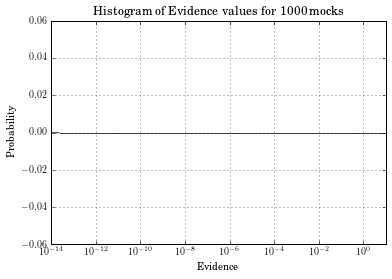

In [10]:
#beatbox.You.all_simulated_universes = np.append(beatbox.You.all_simulated_universes, beatbox.Universe())
#beatbox.You.all_simulated_universes[-1].fngrid= beatbox.You.all_simulated_universes[0].fngrid*beatbox.Universe.kfilter
#beatbox.You.all_simulated_universes[-1].transform_3D_potential_into_alm()
#fromthis = 'RobustnessAnalysis/MockUniverse_nmax15_lmax60_noiseupto8/TrueUniverse.fits'
#beatbox.You.all_simulated_universes[-1].read_in_CMB_T_map(from_this = fromthis)
#beatbox.You.all_simulated_universes[-1].decompose_T_map_into_spherical_harmonics(lmax=60)
#beatbox.You.all_simulated_universes[-1].alm2ay()
#beatbox.You.all_simulated_universes[-1].ay2alm(beatbox.You.all_simulated_universes[-1].ay)
#beatbox.You.all_simulated_universes[-1].show_CMB_T_map()
#execfile ('_SigmaDevPlot.py')
#print sigmas_dev, probabilities2, pvals, chi2vals
execfile('_CalcEvidence.py')


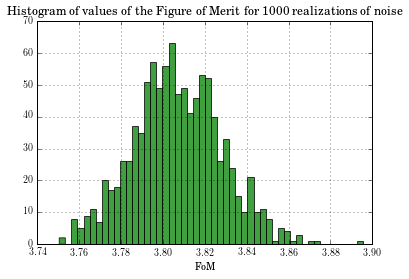

3.80682341765


In [11]:
execfile ('_FigofMerit.py')

Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 0.3126837
0.122477468846 1.79995253299 13.4187603349 -7.1111847374
0.132092051072 1.89530326196 10.7086078815 -15.6860801121


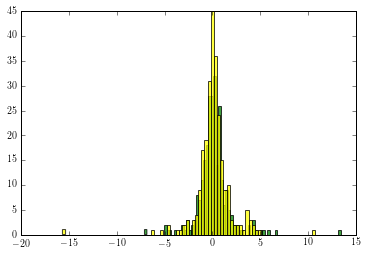

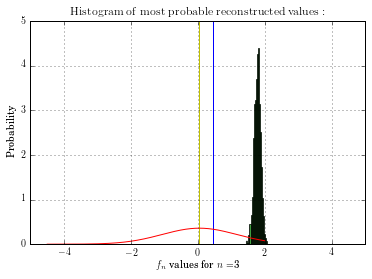

In [13]:
execfile ('_PlotMostProbVals.py')

In [ ]:
num = 3
execfile ('_PlotMargPost.py')

In [ ]:
beatbox.You.all_reconstructed_universes[500].evaluate_potential_given_fourier_coefficients()
beatbox.You.all_simulated_universes[-1].rearrange_fn_from_vector_to_grid()
beatbox.You.all_simulated_universes[-1].evaluate_potential_given_fourier_coefficients()


In [ ]:
plt.imshow(beatbox.You.all_reconstructed_universes[500].phi[21,:,:])

In [ ]:
plt.imshow(beatbox.You.all_simulated_universes[-1].phi[21,:,:])

In [ ]:
a ,b = beatbox.You.calculate_chi2_in_posterior( beatbox.You.all_simulated_universes[-1].fn, beatbox.You.all_reconstructed_universes[-4].fn)
print a,b




In [ ]:
chi2.cdf(428.9, 924) 



In [ ]:
print np.dot(np.dot((beatbox.You.all_simulated_universes[2].fn - beatbox.You.all_reconstructed_universes[0].fn), beatbox.You.inv_A), (beatbox.You.all_simulated_universes[2].fn - beatbox.You.all_reconstructed_universes[0].fn).T)

In [ ]:
print 100*np.sqrt(np.mean(realbias**2/PS[:(len(beatbox.You.all_reconstructed_universes[-1].fn)/2)]) )
print 100*np.sqrt(np.mean(imagbias**2/PS[(len(beatbox.You.all_reconstructed_universes[-1].fn)/2):]) )

In [ ]:
n, bins, patches = plt.hist(np.diag(beatbox.You.inv_A)[:(len(beatbox.You.all_reconstructed_universes[-1].fn)/2)], 40, normed=0, facecolor='green', alpha=0.75)

n, bins, patches = plt.hist(np.diag(beatbox.You.inv_A)[(len(beatbox.You.all_reconstructed_universes[-1].fn)/2):], 40, normed=0, facecolor='yellow', alpha=0.75)

plt.savefig('RobustnessAnalysis/rob_plt_lmax'+str(beatbox.Universe.truncated_lmax)+'_lmin'+str(beatbox.Universe.truncated_lmin)+'_nmax'+str(beatbox.Universe.truncated_nmax)+'_nmin'+str(beatbox.Universe.truncated_nmin)+'/A_histogram.png')

#plt.axis([0, 52, 0, 0.2])



plt.show()

In [ ]:
print 100.*np.mean(np.sqrt(np.diag(beatbox.You.inv_A)[:(len(beatbox.You.all_reconstructed_universes[-1].fn)/2)]/PS[:(len(beatbox.You.all_reconstructed_universes[-1].fn)/2)]))
print 100.*np.mean(np.sqrt(np.diag(beatbox.You.inv_A)[(len(beatbox.You.all_reconstructed_universes[-1].fn)/2):]/PS[(len(beatbox.You.all_reconstructed_universes[-1].fn)/2):]))
print 100.*np.mean(np.sqrt(np.diag(beatbox.You.inv_A)/PS))

In [ ]:
print 100.*np.mean(np.sqrt(realbias**2/np.diag(beatbox.You.inv_A)[:(len(beatbox.You.all_reconstructed_universes[-1].fn)/2)]))
print 100.*np.mean(np.sqrt(imagbias**2/np.diag(beatbox.You.inv_A)[(len(beatbox.You.all_reconstructed_universes[-1].fn)/2):]))

In [ ]:
np.mean(np.sqrt((beatbox.You.all_reconstructed_universes[-1].fn - beatbox.You.all_simulated_universes[2].fn)**2/np.diag(beatbox.You.inv_A)))

In [ ]:
beatbox.You.C_yy.shape

In [ ]:
print np.mean(np.sqrt((beatbox.You.all_simulated_universes[-1].fn-beatbox.You.all_reconstructed_universes[-1].fn)**2/np.diag(beatbox.You.inv_A)))
print np.mean(np.sqrt((beatbox.You.all_reconstructed_universes[-1].fn - beatbox.You.all_simulated_universes[-1].fn)**2/np.diag(beatbox.You.inv_A)))
print len(np.where((beatbox.You.all_simulated_universes[-1].fn-beatbox.You.all_reconstructed_universes[500].fn)/np.sqrt(np.diag(beatbox.You.inv_A)) < 1.)[0])/float(len(beatbox.You.all_reconstructed_universes[-1].fn))    

In [ ]:
beatbox.You.all_data_universes[500].show_CMB_T_map()
beatbox.You.all_simulated_universes[-1].show_CMB_T_map()
beatbox.You.all_reconstructed_universes[500].show_CMB_T_map()
beatbox.You.all_reconstructed_universes[-1].show_CMB_T_map()
hp.mollview(beatbox.You.all_data_universes[500].Tmap-beatbox.You.all_reconstructed_universes[500].Tmap,  rot=(-90,0,0))
hp.mollview(beatbox.You.all_simulated_universes[-1].Tmap-beatbox.You.all_reconstructed_universes[500].Tmap,  rot=(-90,0,0))

In [ ]:
beatbox.You.all_simulated_universes[0].lmax=60
beatbox.You.all_simulated_universes[0].show_lowest_spherical_harmonics_of_CMB_T_map(lmax=8,max=100)
hp.mollview(beatbox.You.all_simulated_universes[0].truncated_map-beatbox.You.all_simulated_universes[-1].Tmap, rot=(-90,0,0),  min=-100, max=100 )